# Task 1 : To predict the percentage of a student based on the number of study hours using Supervised Machine Learning



### It is a simple linear regression task of just 2 variables

### Question: What will be predicted score if a student studies for 9.25 hrs/ day? 

### Author: Deepak Kumar 


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


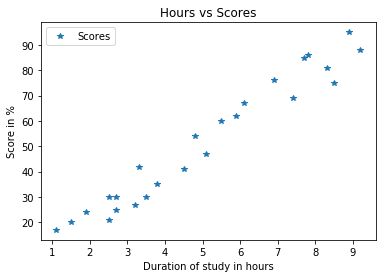

In [21]:
#understanding the relation by plotting the graph
df.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs Scores')
plt.xlabel('Duration of study in hours')
plt.ylabel('Score in %')
plt.show()


In [22]:
#Now, Dividing the data
x = df.iloc[:, :-1].values
y = df.iloc[:,1].values


In [23]:
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [24]:
#now, splitting the data into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [25]:
#now, training with LR
rgs = LinearRegression()
rgs.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

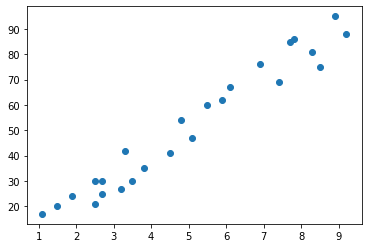

In [26]:
#now, plotting the LoR from the scatter polts: step1
plt.scatter(x,y)


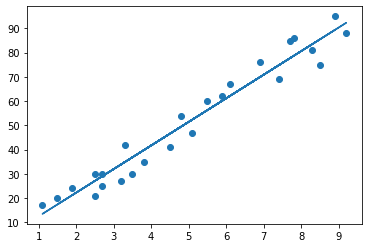

In [27]:
#step2
plt.scatter(x,y)
plt.plot(x, (rgs.coef_*x+rgs.intercept_))


In [28]:
#now, comparision of actual and predicted
df = pd.DataFrame({'actual': y_test, 'predicted': rgs.predict(x_test)})

In [29]:
df

,actual,predicted
0,21,27.080346
1,24,21.242024
2,35,39.730043
3,17,13.457595
4,62,60.164170
5,69,74.759975
6,86,78.652190


In [30]:
#now, as per the problem, we make a prediction of a student who studies 9.25 hours
p = 9.25
prdhour = rgs.predict([[p]])
print("Duration of study in Hours = ", p)
print("Score in percentage =",prdhour[0])


Duration of study in Hours =  9.25
Score in percentage = 92.76146757371538


In [31]:
#Now, Looking for how good the model is, by looking to the values of the below
from sklearn import metrics
print('Mean Absolute Error is,', metrics.mean_absolute_error(y_test, rgs.predict(x_test)))
print('Mean Squred Error is,', metrics.mean_squared_error(y_test, rgs.predict(x_test)))
print('Root Mean Squred Error is,', np.sqrt(metrics.mean_squared_error(y_test, rgs.predict(x_test))))


Mean Absolute Error is, 4.579197972396169
Mean Squred Error is, 24.290983505452427
Root Mean Squred Error is, 4.928588388722721
